<a href="https://colab.research.google.com/github/demianvk/demianvk/blob/main/ES_DOE2_8760.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import os
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Colab Notebooks/")

Mounted at /content/gdrive


In [ ]:
rd_df = pd.read_csv("Proposed6_VRV01.csv")
rd_df.rename(columns={'Year':'year',' Month':'month',' Day':'day',' Hour':'hour', ' DB':'outdoor temp'}, inplace=True)#it works!!!!

In [ ]:
#rd_df.rename(columns={'Year':'year',' Month':'month',' Day':'day',' Hour':'hour', ' DB':'outdoor temp'}, inplace=True)#it works!!!!

In [ ]:
rd_df.head()

,year,month,day,hour,outdoor temp,WB,Solar,TDV Elec,Elec Heat,Elec Cool,Elec InLight,Elec OutLight,Elec ProcLight,Elec Recep,Elec Fans,Elec HR,Elec Pumps,Elec Process,Elec DHW,Elec Exterior,TDV Gas,Gas Heat,Gas Cool,Gas Process,Gas DHW,Gas Exterior,HW Load,CHW Load,Tank Melt,Tank Cap,ElecCO2,GasCO2
0,0,1,1,1,45,43,0,0,2320,0,1663,2560,0,8261,793,0,0,0,164,0,0,1,0,0,0,0,0,0,0,0,5.832,0
1,0,1,1,2,46,45,0,0,0,0,1663,2560,0,8261,0,0,0,0,164,0,0,0,0,0,0,0,0,0,0,0,4.680,0
2,0,1,1,3,48,46,0,0,1903,0,1663,2560,0,8261,793,0,0,0,164,0,0,1,0,0,0,0,0,0,0,0,5.677,0
3,0,1,1,4,46,45,0,0,0,0,1663,2560,0,8261,0,0,0,0,164,0,0,0,0,0,0,0,0,0,0,0,4.680,0
4,0,1,1,5,48,46,0,0,1920,0,1663,2560,0,8261,793,0,0,0,164,0,0,1,0,0,0,0,0,0,0,0,5.684,0


In [ ]:
rd_df.info()

In [ ]:
rd_df['year'] = rd_df.apply(lambda x : rd_df['year']+2000, axis=1)#make the year actually look like a year in the DF.
rd_df['hour'] = rd_df['hour'].sub(1)
rd_df['total_elec'] = rd_df.iloc[:,8:-12].sum(axis=1)#add up the electric usage
rd_df['total_heatcool'] = rd_df.iloc[:,8:10].sum(axis=1)#add up the heating and coooling usage
rd_df['total_heatcool_fans'] = rd_df.iloc[:,[14,33]].sum(axis=1)
rd_df['total_heatcool_fans'] = rd_df['total_heatcool_fans'].div(1000) #get kbtu

In [ ]:
#rd_df['hour'] = rd_df['hour'].sub(1)

**DateTime needs to be 0-23 (not 1-24)**

In [ ]:
rd_df.head(20)

In [ ]:
#rd_df['total_elec'] = rd_df.iloc[:,8:-12].sum(axis=1)#add up the electric usage

In [ ]:
#rd_df['total_heatcool'] = rd_df.iloc[:,8:10].sum(axis=1)#add up the heating and coooling usage

In [ ]:
#rd_df['total_heatcool_fans'] = rd_df.iloc[:,[14,32]].sum(axis=1)

In [ ]:
#rd_df['total_heatcool_fans'] = rd_df['total_heatcool_fans'].div(1000) #get kbtu

In [ ]:
rd_df['time'] = rd_df['hour'].map(str) + ':00' + ':00'
rd_df['date_time'] = rd_df['year'].map(str) + '-' + rd_df['month'].map(str) + '-' + rd_df['day'].map(str) + ' ' + rd_df['time'].map(str) #convert to string and combine - awesome

In [ ]:
#rd_df['date_time'] = rd_df['year'].map(str) + '-' + rd_df['month'].map(str) + '-' + rd_df['day'].map(str) + ' ' + rd_df['time'].map(str) #convert to string and combine - awesome

In [ ]:
rd_filter = rd_df.filter(['date_time', 'total_heatcool_fans', 'outdoor temp'], axis=1)

In [ ]:
rd_filter.to_csv('doeElecUse.csv', encoding='utf-8', index=False)#Open this file next time.

The above 7 steps create columns for the energy use as well as creating the DateTime column for reference.

In [ ]:
df = pd.read_csv("doeElecUse.csv", parse_dates=['date_time'],index_col='date_time')
#df = df.resample("D").mean()

In [ ]:
df = df.resample("D").mean()

In [ ]:
df = df[df['total_heatcool_fans']>5]

**re-input with date_time loaded.**

In [ ]:
df.head()

,total_heatcool_fans,outdoor temp
date_time,,
2000-01-02,70629.208333,45.166667
2000-01-04,76010.916667,41.750000
2000-01-05,60190.541667,44.125000
2000-01-06,54160.333333,46.958333
2000-01-07,52356.083333,55.000000


In [ ]:
df.info(50)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2000-01-04 to 2000-12-30
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_heatcool_fans  251 non-null    float64
 1   outdoor temp         251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


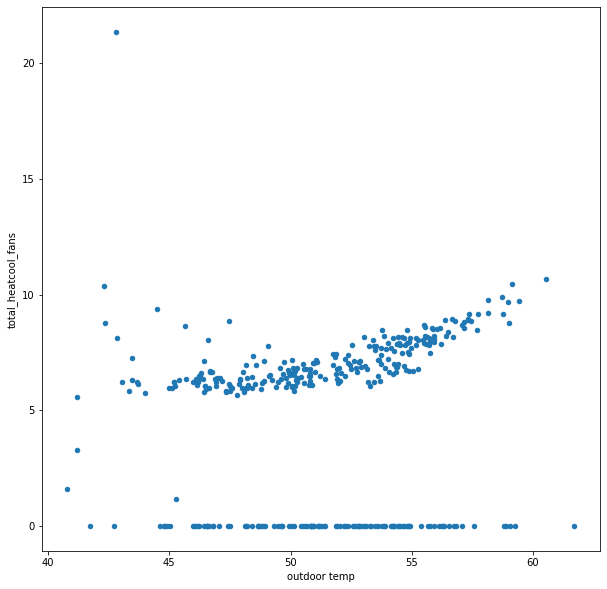

In [ ]:
df.plot(kind='scatter', x='outdoor temp', y='total_heatcool_fans', figsize=(10,10))

In [ ]:
df.resample('D').mean().plot(kind='scatter', x='outdoor temp', y='total_heatcool_fans', figsize=(15,10))

In [ ]:
def make_color_division(x):
  if x <55:
    return "Heating"
  else:
    return "Cooling"  

In [ ]:
df['heat_v_cool'] = df['outdoor temp'].apply(lambda x: make_color_division(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


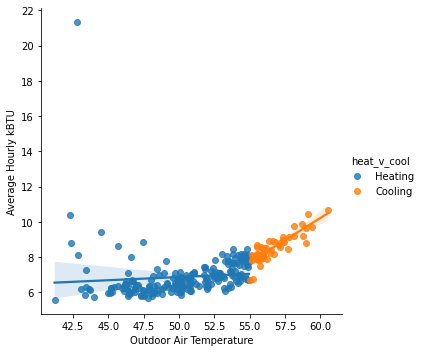

In [ ]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(25,50))
g = sns.lmplot(x="outdoor temp", y="total_heatcool_fans", hue="heat_v_cool",
               truncate=True, data=df, legend=True)

g.set_axis_labels("Outdoor Air Temperature", "Average Hourly kBTU")